# Movielens Case Study

In [1]:
import pandas as pd

# Analysis Tasks to be performed:

### 1. Import the three datasets

In [2]:
dataframe_movies = pd.read_csv('movies.dat', sep='::', names=['MovieID', 'Title', 'Genere'])

<ipython-input-2-a0250c3f5cd7>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  dataframe_movies = pd.read_csv('movies.dat', sep='::', names=['MovieID', 'Title', 'Genere'])


In [3]:
dataframe_movies.head()

,MovieID,Title,Genere
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [4]:
dataframe_ratings = pd.read_csv('ratings.dat', sep = '::', names = ['UserID', 'MovieID', 'Rating', 'Timestamp'])
dataframe_ratings.head()

<ipython-input-4-bbbf5d4065b1>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  dataframe_ratings = pd.read_csv('ratings.dat', sep = '::', names = ['UserID', 'MovieID', 'Rating', 'Timestamp'])


,UserID,MovieID,Rating,Timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [5]:
dataframe_users = pd.read_csv('users.dat', sep = '::', names = ['UserID', 'Genre', 'Age', 'Occupation', 'Zipcode'])
dataframe_users.head()

<ipython-input-5-75182c7b1202>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  dataframe_users = pd.read_csv('users.dat', sep = '::', names = ['UserID', 'Genre', 'Age', 'Occupation', 'Zipcode'])


,UserID,Genre,Age,Occupation,Zipcode
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [6]:
print(dataframe_movies.shape)
print(dataframe_ratings.shape)
print(dataframe_users.shape)

(3883, 3)
(1000209, 4)
(6040, 5)


In [7]:
print(dataframe_movies.columns)
print(dataframe_ratings.columns)
print(dataframe_users.columns)

Index(['MovieID', 'Title', 'Genere'], dtype='object')
Index(['UserID', 'MovieID', 'Rating', 'Timestamp'], dtype='object')
Index(['UserID', 'Genre', 'Age', 'Occupation', 'Zipcode'], dtype='object')


### 2. Create a new dataset [Master_Data] with the following columns MovieID Title UserID Age Gender Occupation Rating.

#### (Hint: (i) Merge two tables at a time. (ii) Merge the tables using two primary keys MovieID & UserId)

## MovieId, Title, UserID, Age, Gender, Occupation, Rating

In [8]:
master_data = pd.merge(dataframe_movies,dataframe_ratings, on = 'MovieID').drop(columns=['Genere','Timestamp'])
master_data

,MovieID,Title,UserID,Rating
0,1,Toy Story (1995),1,5
1,1,Toy Story (1995),6,4
2,1,Toy Story (1995),8,4
3,1,Toy Story (1995),9,5
4,1,Toy Story (1995),10,5
...,...,...,...,...
1000204,3952,"Contender, The (2000)",5812,4
1000205,3952,"Contender, The (2000)",5831,3
1000206,3952,"Contender, The (2000)",5837,4
1000207,3952,"Contender, The (2000)",5927,1


In [9]:
movie_master_data = pd.merge(master_data, dataframe_users, on='UserID').drop(columns=['Zipcode'])
movie_master_data

,MovieID,Title,UserID,Rating,Genre,Age,Occupation
0,1,Toy Story (1995),1,5,F,1,10
1,48,Pocahontas (1995),1,5,F,1,10
2,150,Apollo 13 (1995),1,5,F,1,10
3,260,Star Wars: Episode IV - A New Hope (1977),1,4,F,1,10
4,527,Schindler's List (1993),1,5,F,1,10
...,...,...,...,...,...,...,...
1000204,3513,Rules of Engagement (2000),5727,4,M,25,4
1000205,3535,American Psycho (2000),5727,2,M,25,4
1000206,3536,Keeping the Faith (2000),5727,5,M,25,4
1000207,3555,U-571 (2000),5727,3,M,25,4


# Explore the datasets using visual representations (graphs or tables), also include your comments on the following:
#### a. User Age Distribution
#### b. User rating of the movie “Toy Story”
#### c. Top 25 movies by viewership rating
#### d. Find the ratings for all the movies reviewed by for a particular user of user id = 2696

In [10]:
movie_master_data.groupby('Age').sum()

,MovieID,UserID,Rating,Occupation
Age,,,,
1,50867723,73950367,96586,238531
18,333194552,511970702,643766,1234389
25,731616469,1234652629,1402339,3119890
35,377252823,605138964,720025,1754438
45,159226454,265866475,304262,713500
50,139030453,218636186,269265,605951
56,74741322,114929148,146070,371119


## a. User Age Distribution

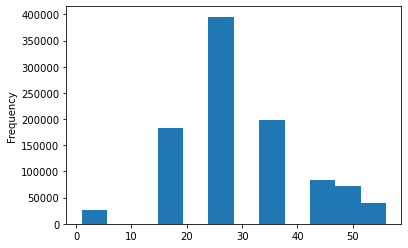

In [11]:
movie_master_data.Age.plot.hist(bins=12)

#### The above age distribution shows that most of the users are 25 years old

## b. User rating of the movie “Toy Story”

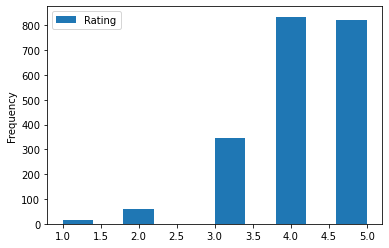

In [12]:
movie_master_data[movie_master_data.Title == 'Toy Story (1995)'][['Rating']].plot.hist()

### Comment - Toy Story (1995) has got 4.5(max) and 5.0(second max - slightly less times) ratings maximum number of times.

## c. Top 25 movies by viewership rating

In [13]:
movie_master_data.head()

,MovieID,Title,UserID,Rating,Genre,Age,Occupation
0,1,Toy Story (1995),1,5,F,1,10
1,48,Pocahontas (1995),1,5,F,1,10
2,150,Apollo 13 (1995),1,5,F,1,10
3,260,Star Wars: Episode IV - A New Hope (1977),1,4,F,1,10
4,527,Schindler's List (1993),1,5,F,1,10


In [14]:
movie_master_data.sort_values('Rating',ascending=False)[['MovieID','Title','Rating']].loc[0:25]

,MovieID,Title,Rating
0,1,Toy Story (1995),5
489283,2858,American Beauty (1999),5
489259,2599,Election (1999),5
489257,2571,"Matrix, The (1999)",5
489256,2551,Dead Ringers (1988),5
...,...,...,...
1000135,2396,Shakespeare in Love (1998),4
1000134,2393,Star Trek: Insurrection (1998),4
21,1097,E.T. the Extra-Terrestrial (1982),4
24,1207,To Kill a Mockingbird (1962),4


## d. Find the ratings for all the movies reviewed by for a particular user of user id = 2696

In [15]:
movie_master_data[movie_master_data['UserID'] == 2696][['MovieID','Title','Rating']]

,MovieID,Title,Rating
991035,350,"Client, The (1994)",3
991036,800,Lone Star (1996),5
991037,1092,Basic Instinct (1992),4
991038,1097,E.T. the Extra-Terrestrial (1982),3
991039,1258,"Shining, The (1980)",4
991040,1270,Back to the Future (1985),2
991041,1589,Cop Land (1997),3
991042,1617,L.A. Confidential (1997),4
991043,1625,"Game, The (1997)",4
991044,1644,I Know What You Did Last Summer (1997),2


# or - 2nd Approach

In [16]:
movie_master_data.groupby('UserID').get_group(2696)[['UserID','Title','Rating']]

,UserID,Title,Rating
991035,2696,"Client, The (1994)",3
991036,2696,Lone Star (1996),5
991037,2696,Basic Instinct (1992),4
991038,2696,E.T. the Extra-Terrestrial (1982),3
991039,2696,"Shining, The (1980)",4
991040,2696,Back to the Future (1985),2
991041,2696,Cop Land (1997),3
991042,2696,L.A. Confidential (1997),4
991043,2696,"Game, The (1997)",4
991044,2696,I Know What You Did Last Summer (1997),2


# Feature Engineering:
####            Use column genres:

#### a. Find out all the unique genres (Hint: split the data in column genre making a list and then process the data to find         out only the unique categories of genres)
#### b. Create a separate column for each genre category with a one-hot encoding ( 1 and 0) whether or not the movie belongs         to that genre. 
#### c. Determine the features affecting the ratings of any particular movie.
#### d. Develop an appropriate model to predict the movie ratings

## a. Find out all the unique genres 
#### (Hint: split the data in column genre making a list and then process the data to find out only the unique categories of genres)

In [17]:
dataframe_movies.head()

,MovieID,Title,Genere
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [18]:
print(dataframe_movies.Genere.unique())

["Animation|Children's|Comedy" "Adventure|Children's|Fantasy"
 'Comedy|Romance' 'Comedy|Drama' 'Comedy' 'Action|Crime|Thriller'
 "Adventure|Children's" 'Action' 'Action|Adventure|Thriller'
 'Comedy|Drama|Romance' 'Comedy|Horror' "Animation|Children's" 'Drama'
 'Action|Adventure|Romance' 'Drama|Thriller' 'Drama|Romance' 'Thriller'
 'Action|Comedy|Drama' 'Crime|Drama|Thriller' 'Drama|Sci-Fi' 'Romance'
 'Adventure|Sci-Fi' 'Adventure|Romance' "Children's|Comedy|Drama"
 'Documentary' 'Drama|War' 'Action|Crime|Drama' 'Action|Adventure'
 'Crime|Thriller' "Animation|Children's|Musical|Romance"
 'Action|Drama|Thriller' "Children's|Comedy" 'Drama|Mystery'
 'Sci-Fi|Thriller' 'Action|Comedy|Crime|Horror|Thriller' 'Drama|Musical'
 'Crime|Drama|Romance' 'Adventure|Drama' 'Action|Thriller'
 "Adventure|Children's|Comedy|Musical" 'Action|Drama|War'
 'Action|Adventure|Crime' 'Crime' 'Drama|Mystery|Romance' 'Action|Drama'
 'Drama|Romance|War' 'Horror' 'Action|Adventure|Comedy|Crime' 'Comedy|War'
 'Action

## b. Create a separate column for each genre category with a one-hot encoding ( 1 and 0) whether or not the movie belongs         to that genre. 

In [19]:
pd.get_dummies(dataframe_movies, columns=['Genere'])

,MovieID,Title,Genere_Action,Genere_Action|Adventure,Genere_Action|Adventure|Animation,Genere_Action|Adventure|Animation|Children's|Fantasy,Genere_Action|Adventure|Animation|Horror|Sci-Fi,Genere_Action|Adventure|Children's,Genere_Action|Adventure|Children's|Comedy,Genere_Action|Adventure|Children's|Fantasy,...,Genere_Romance|Thriller,Genere_Romance|War,Genere_Romance|Western,Genere_Sci-Fi,Genere_Sci-Fi|Thriller,Genere_Sci-Fi|Thriller|War,Genere_Sci-Fi|War,Genere_Thriller,Genere_War,Genere_Western
0,1,Toy Story (1995),0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,Waiting to Exhale (1995),0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Father of the Bride Part II (1995),0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3878,3948,Meet the Parents (2000),0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3879,3949,Requiem for a Dream (2000),0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3880,3950,Tigerland (2000),0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3881,3951,Two Family House (2000),0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## c. Determine the features affecting the ratings of any particular movie.

In [20]:
movie_master_data.head()

,MovieID,Title,UserID,Rating,Genre,Age,Occupation
0,1,Toy Story (1995),1,5,F,1,10
1,48,Pocahontas (1995),1,5,F,1,10
2,150,Apollo 13 (1995),1,5,F,1,10
3,260,Star Wars: Episode IV - A New Hope (1977),1,4,F,1,10
4,527,Schindler's List (1993),1,5,F,1,10


In [21]:
import seaborn as sns


In [22]:
movie_master_data.columns

Index(['MovieID', 'Title', 'UserID', 'Rating', 'Genre', 'Age', 'Occupation'], dtype='object')

In [23]:
movie_data = pd.get_dummies(movie_master_data,columns=['Genre'])

In [24]:
movie_data.drop(['MovieID','UserID'], axis= 1, inplace=True)

In [25]:
corr = movie_data.corr()

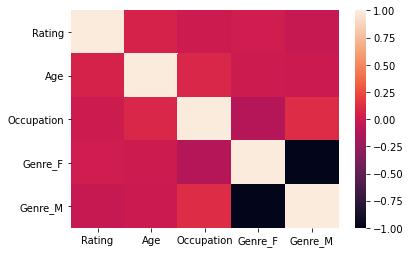

In [26]:
sns.heatmap(corr)

In [27]:
corr

,Rating,Age,Occupation,Genre_F,Genre_M
Rating,1.000000,0.056869,0.006753,0.019861,-0.019861
Age,0.056869,1.000000,0.078371,0.003189,-0.003189
Occupation,0.006753,0.078371,1.000000,-0.114974,0.114974
Genre_F,0.019861,0.003189,-0.114974,1.000000,-1.000000
Genre_M,-0.019861,-0.003189,0.114974,-1.000000,1.000000


## d. Develop an appropriate model to predict the movie ratings

In [28]:
movie_master_data.isna().any()

MovieID       False
Title         False
UserID        False
Rating        False
Genre         False
Age           False
Occupation    False
dtype: bool

In [29]:
df_movie_data = pd.get_dummies(movie_master_data,columns=['Genre'])

In [30]:
df_movie_data.columns

Index(['MovieID', 'Title', 'UserID', 'Rating', 'Age', 'Occupation', 'Genre_F',
       'Genre_M'],
      dtype='object')

In [31]:
X_feature = df_movie_data[['Age', 'Genre_F','Genre_M']]
y_feature = df_movie_data['Rating']

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
X_train,X_test,y_train,y_test = train_test_split(X_feature,y_feature,random_state=1)

In [34]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(750156, 3)
(750156,)
(250053, 3)
(250053,)


In [35]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train,y_train)

F:\Jupiter\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [36]:
print(logreg.coef_)
print(logreg.intercept_)

[[-0.01578369 -0.20618008 -0.21019309]
 [-0.00366343 -0.16926092 -0.0654258 ]
 [ 0.00425715  0.09803536  0.12206175]
 [ 0.00743682  0.19672133  0.16024936]
 [ 0.00775315  0.08068431 -0.00669221]]
[-0.41640902 -0.23471366  0.2201179   0.35701189  0.07399289]


In [37]:
y_pred = logreg.predict(X_test)

In [38]:
from sklearn import metrics

In [39]:
metrics.confusion_matrix(y_pred,y_test)

array([[    0,     0,     0,     0,     0],
       [    0,     0,     0,     0,     0],
       [    0,     0,     0,     0,     0],
       [14151, 26976, 65138, 87693, 56095],
       [    0,     0,     0,     0,     0]], dtype=int64)

In [40]:
from sklearn.metrics import accuracy_score

In [41]:
accuracy_score(y_pred,y_test)

0.3506976520977553

In [42]:
logreg.score(X_test,y_test)

0.3506976520977553

### Accuracy of the above matrix is 35.07 %